In [2]:
# Importes
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
# Cargar el conjunto de datos de levadura
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
column_names = ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Class']
dataset = pd.read_csv(url, names=column_names, delimiter='\s+')

In [4]:
#características (X) y las etiquetas (y) del dataset
X = dataset.drop(['Sequence Name', 'Class'], axis=1)
y = dataset['Class']

n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
# El transformer calcula el grafo de los vecinos más cercanos utilizando el número
# máximo de vecinos necesario en la búsqueda de la rejilla. 
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list), mode="distance")
classifier_model = KNeighborsClassifier(metric="precomputed")

In [ ]:

full_model = Pipeline(
    steps=[("graph", graph_model), ("classifier", classifier_model)]
)

param_grid = {"classifier__n_neighbors": n_neighbors_list}
grid_model = GridSearchCV(full_model, param_grid)
grid_model.fit(X, y)


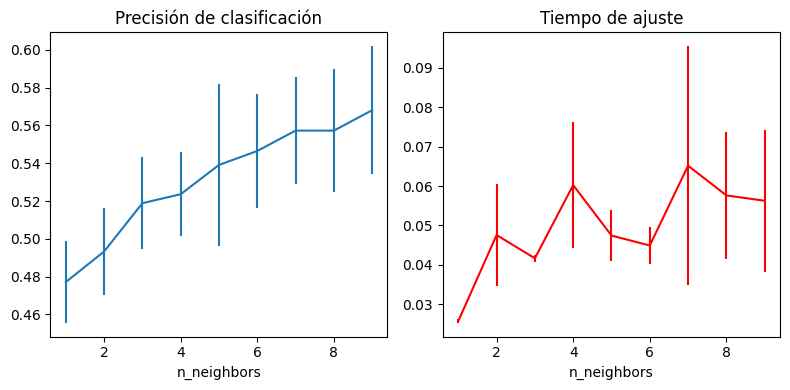

In [7]:
# Graficar los resultados de la búsqueda de hiperparámetros.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_test_score"],
    yerr=grid_model.cv_results_["std_test_score"],
)
axes[0].set(xlabel="n_neighbors", title="Precisión de clasificación")
axes[1].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_fit_time"],
    yerr=grid_model.cv_results_["std_fit_time"],
    color="r",
)
axes[1].set(xlabel="n_neighbors", title="Tiempo de ajuste")
fig.tight_layout()
plt.show()